# California Wildfire damage

## Read & Clean Data

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # For treemaps
import numpy as np
from scipy import stats


In [2]:
California_Wildfire=pd.read_csv("California Wildfire Damage.csv")
California_Wildfire.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [3]:
California_Wildfire.isna().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [4]:
California_Wildfire.drop_duplicates(inplace=True)


In [5]:
California_Wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [ ]:

California_Wildfire['Date'] = pd.to_datetime(California_Wildfire['Date'])
California_Wildfire['year'] = California_Wildfire['Date'].dt.year
California_Wildfire['month'] = California_Wildfire['Date'].dt.month

# Define a function to determine the season
def get_season(Date):
    month = Date.month
    day = Date.day
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 21):
        return 'Winter'
    elif (month == 3 and day >= 21) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 21):
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to get the season
California_Wildfire['season'] = California_Wildfire['Date'].apply(get_season)



In [7]:
California_Wildfire.head(1)

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,year,month,season
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,11,Fall


## Q0. Primary information 

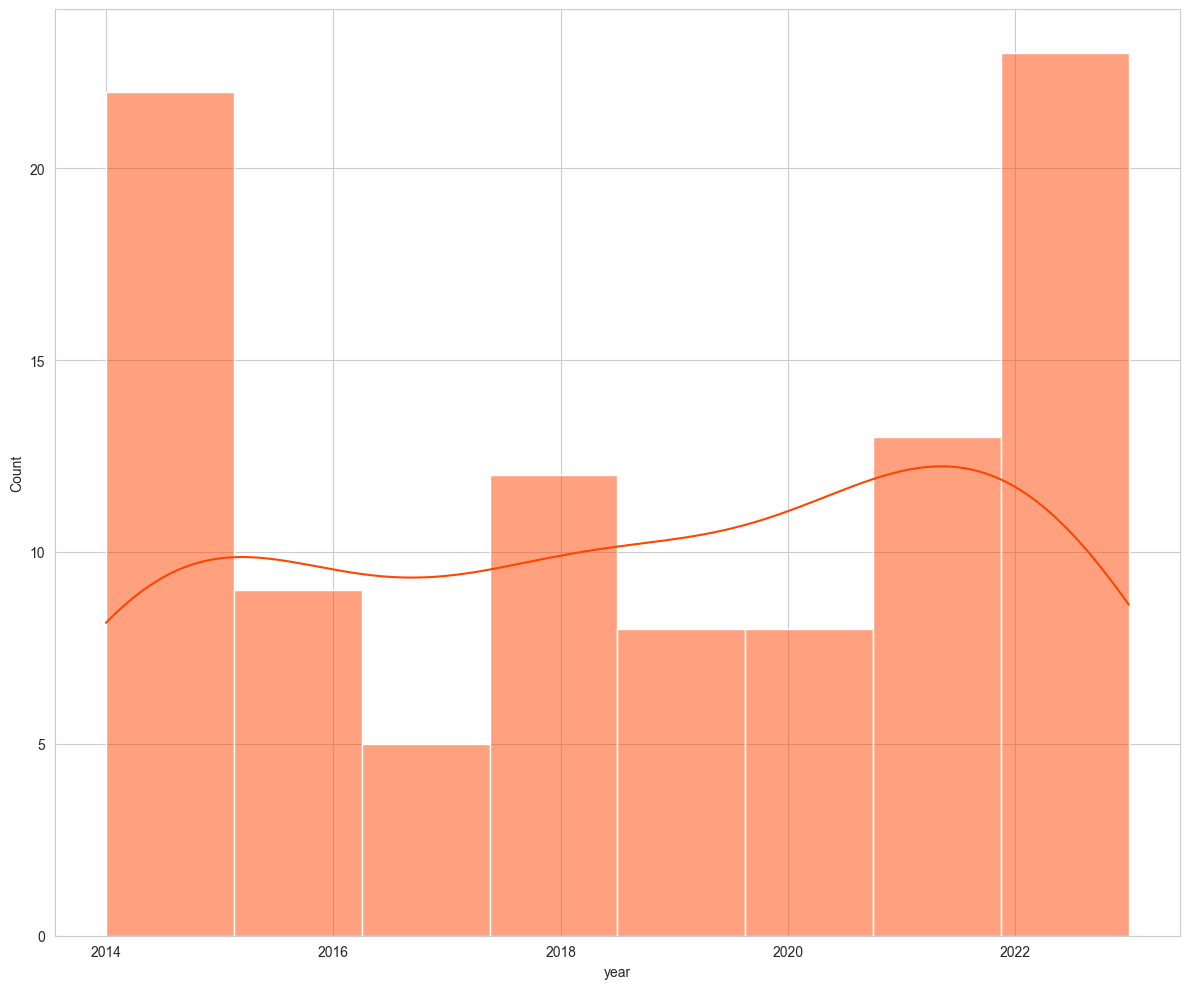

In [ ]:
plt.figure(figsize=(12,10),)
sns.histplot(data=California_Wildfire,
             x='year',
             color='#ff4500',
             kde=True)
plt.tight_layout()
plt.show()

## Q1. which area have most damage

In [39]:
Number_Of_Fatalities=California_Wildfire.groupby('Location')['Fatalities'].sum().reset_index().nlargest(n=10,columns='Fatalities').reset_index(drop=True)
Number_Of_Fatalities

,Location,Fatalities
0,Shasta County,146
1,Mendocino County,122
2,San Diego County,115
3,Sonoma County,113
4,Orange County,107
5,Butte County,100
6,Napa Valley,90
7,Santa Barbara County,74
8,Riverside County,72
9,Los Angeles County,54


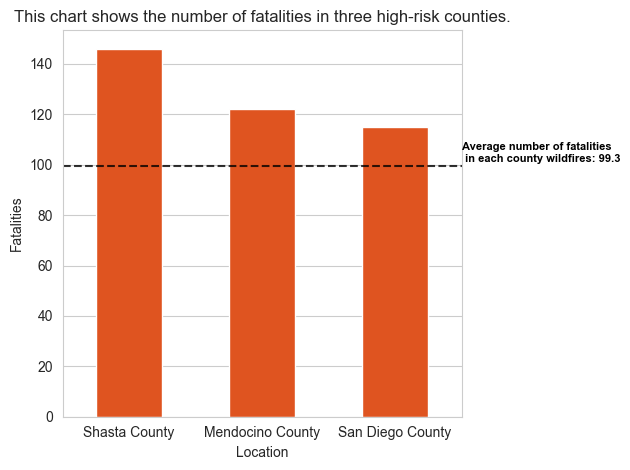

In [115]:
Plot_Number_Of_Fatalities=Number_Of_Fatalities.nlargest(n=3,columns='Fatalities')
plt.Figure(figsize=(15,11))
ax=sns.barplot(data=Plot_Number_Of_Fatalities,
            x='Location',
            y='Fatalities',
            color='#FF4500',
            width=.5)
mean_fatalities =Number_Of_Fatalities['Fatalities'].mean()

# Add horizontal line at mean value
plt.axhline(y=mean_fatalities, color='black', linestyle='--', alpha=0.8)


plt.text(
    x=2.5,
    y=mean_fatalities + 1,  
    s=f'Average number of fatalities \n in each county wildfires: {mean_fatalities:.1f}',
    color='black',
    fontsize=8,                    # Larger font size
    fontweight='bold',              # Make text bold
    va='bottom'
)
plt.title("This chart shows the number of fatalities in three high-risk counties.")
plt.tight_layout()
plt.show()

In [10]:
Number_Of_Vehical_Damege=California_Wildfire.groupby('Location')['Vehicles_Damaged'].sum().reset_index().sort_values(by='Vehicles_Damaged',ascending=False).reset_index(drop=True)
Number_Of_Vehical_Damege

,Location,Vehicles_Damaged
0,Shasta County,2280
1,Sonoma County,2238
2,Butte County,1815
3,San Diego County,1797
4,Mendocino County,1568
5,Napa Valley,1473
6,Riverside County,1169
7,Los Angeles County,1076
8,Santa Barbara County,818
9,Orange County,799


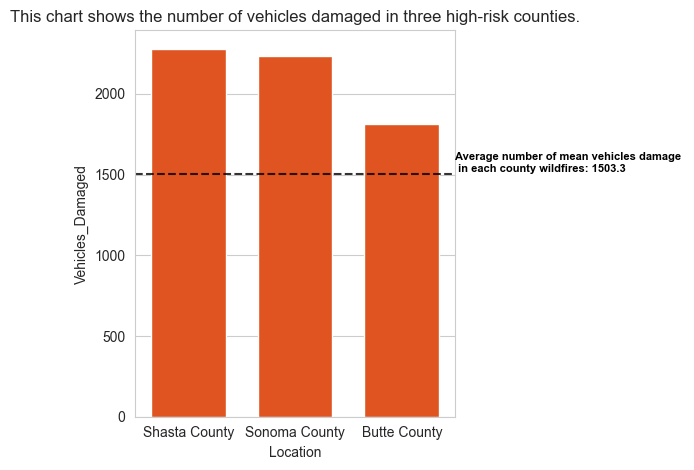

In [ ]:
Plot_Number_Of_Vehical_Damege=Number_Of_Vehical_Damege.nlargest(n=3,columns='Vehicles_Damaged')
plt.Figure(figsize=(18,15))
ax=sns.barplot(data=Plot_Number_Of_Vehical_Damege,
            x='Location',
            y='Vehicles_Damaged',
            color='#FF4500',
            width=.7)
mean_vehicles_damage =Number_Of_Vehical_Damege['Vehicles_Damaged'].mean()


plt.axhline(y=mean_vehicles_damage, color='black', linestyle='--', alpha=0.8)

plt.text(
    x=2.5,                            
    y=mean_vehicles_damage + 1,          
    s=f'Average number of mean vehicles damage \n in each county wildfires: {mean_vehicles_damage:.1f}',
    color='black',
    fontsize=8,                    
    fontweight='bold',              
    va='bottom'
)
plt.title("This chart shows the number of vehicles damaged in three high-risk counties.")
plt.tight_layout()
plt.show()

In [12]:
Number_Of_Homes_Damage=California_Wildfire.groupby('Location')['Homes_Destroyed'].sum().reset_index().sort_values(by='Homes_Destroyed',ascending=False).reset_index(drop=True)
Number_Of_Homes_Damage

,Location,Homes_Destroyed
0,Mendocino County,13166
1,Shasta County,11855
2,Sonoma County,10991
3,Butte County,10940
4,San Diego County,9201
5,Riverside County,9007
6,Napa Valley,8960
7,Santa Barbara County,8915
8,Orange County,6484
9,Los Angeles County,4670


In [13]:
Number_Of_Businesses_Destroyed=California_Wildfire.groupby('Location')['Businesses_Destroyed'].sum().reset_index().sort_values(by='Businesses_Destroyed',ascending=False).reset_index(drop=True)
Number_Of_Businesses_Destroyed

,Location,Businesses_Destroyed
0,Shasta County,3406
1,Sonoma County,3406
2,San Diego County,3040
3,Napa Valley,2780
4,Mendocino County,2450
5,Orange County,2400
6,Butte County,2149
7,Riverside County,2132
8,Los Angeles County,1961
9,Santa Barbara County,1433


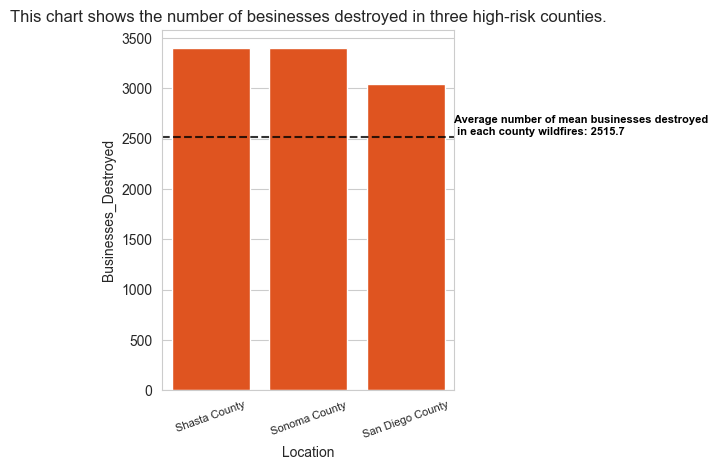

In [92]:
Plot_Number_Of_Businesses_Destroyed=Number_Of_Businesses_Destroyed.nlargest(n=3,columns='Businesses_Destroyed')
ax=sns.barplot(data=Plot_Number_Of_Businesses_Destroyed,
            x='Location',
            y='Businesses_Destroyed',
            color='#ff4500')
mean_businesses_destroyed =Number_Of_Businesses_Destroyed['Businesses_Destroyed'].mean()

# Add horizontal line at mean value
plt.axhline(y=mean_businesses_destroyed, color='black', linestyle='--', alpha=0.8)

# Add text 'This is mean' near the line
plt.text(
    x=2.5,                            # Start of x-axis
    y=mean_businesses_destroyed + 1,          # Slightly above the mean line
    s=f'Average number of mean businesses destroyed \n in each county wildfires: {mean_businesses_destroyed:.1f}',
    color='black',
    fontsize=8,                    # Larger font size
    fontweight='bold',              # Make text bold
    va='bottom'
)
plt.title("This chart shows the number of besinesses destroyed in three high-risk counties.")
plt.xticks(rotation=20,fontsize=8)
plt.tight_layout()
plt.show()

In [15]:
California_Wildfire.rename(columns={'Estimated_Financial_Loss (Million $)': 'Financial_Loss'},inplace=True)
California_Wildfire.head(1)

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Financial_Loss,Cause,year,month,season
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,11,Fall


In [16]:
Total_Fainancial_Loss=California_Wildfire.groupby('Location')['Financial_Loss'].sum().reset_index().sort_values(by='Financial_Loss',ascending=False).reset_index(drop=True)
Total_Fainancial_Loss

,Location,Financial_Loss
0,Shasta County,37232.24
1,Butte County,36187.83
2,Mendocino County,23864.77
3,San Diego County,22914.56
4,Sonoma County,22501.82
5,Napa Valley,21946.82
6,Riverside County,21662.94
7,Orange County,19302.26
8,Santa Barbara County,17397.26
9,Los Angeles County,16599.43


The results show that Shasta county has seen the most human and financial damages. Therefore, the county is very dangerous and you should think of more protective measures for its safety

## Q2.most damage for what reason & most fire cause

In [17]:
Reason_Of_Light=California_Wildfire.groupby(['Cause'])[['Financial_Loss','Fatalities']].sum().reset_index().sort_values(by=['Fatalities','Financial_Loss'],ascending=False).reset_index(drop=True)
Reason_Of_Light

,Cause,Financial_Loss,Fatalities
0,Unknown,74293.48,365
1,Human Activity,85355.04,345
2,Lightning,79961.41,283


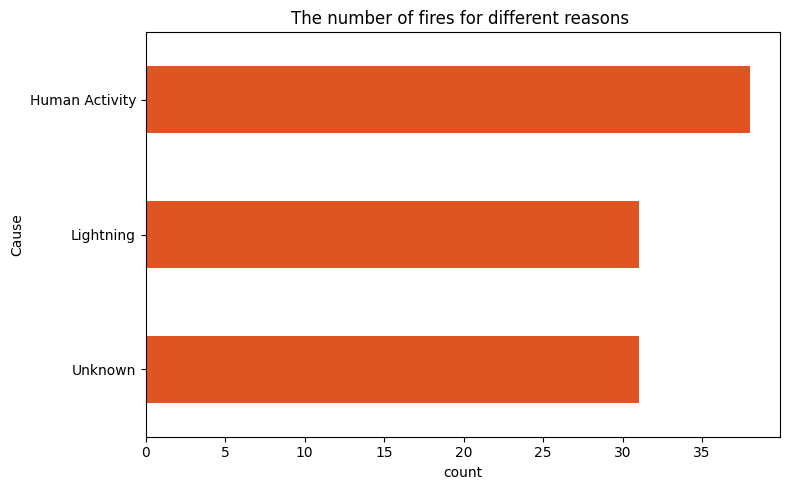

In [18]:
Fire_Cause_Count=California_Wildfire.groupby('Cause')['Cause'].value_counts().reset_index()
Fire_Cause_Count
plt.figure(figsize=(8,5))
sns.barplot(data=Fire_Cause_Count,
            x='count',
            y='Cause',
            color='#ff4500',
            width=.5)
plt.title('The number of fires for different reasons ')
plt.tight_layout()

plt.show()

According to these results, more skilled experts should be used to determine the origin of the fires. Because the fire with the origin of human activities is in the second place, it is possible to prevent more fires and damages by knowing more about the origin of the fire and educating the people.

## Q3.The trend of damages over the years in Shasta county

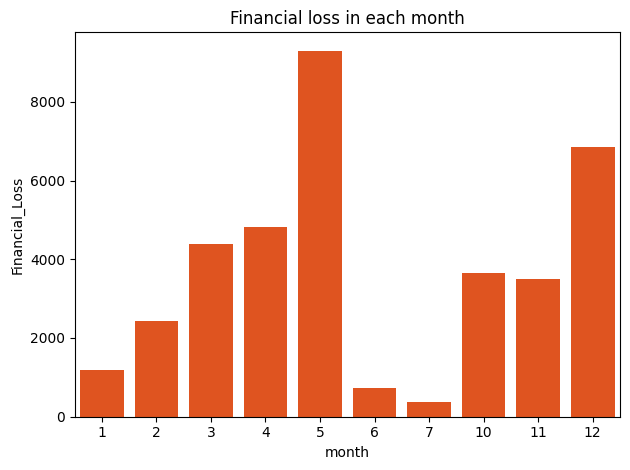

In [19]:

Filter_For_Shasta=California_Wildfire[California_Wildfire['Location']=='Shasta County']
Total_Fainancial_Loss_In_Each_Month=Filter_For_Shasta.groupby('month')['Financial_Loss'].sum().reset_index()
plt.Figure(figsize=(16,12))
sns.barplot(data=Total_Fainancial_Loss_In_Each_Month,
             x='month',
             y='Financial_Loss',
             color='#ff4500')
plt.title('Financial loss in each month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





According to this graph, the average damage caused by fire is higher in Shasta county during the 10th-12th months, which can be due to the lack of preparation of relief organizations.

## Q4.how has the frequency of wildfires changed over the years

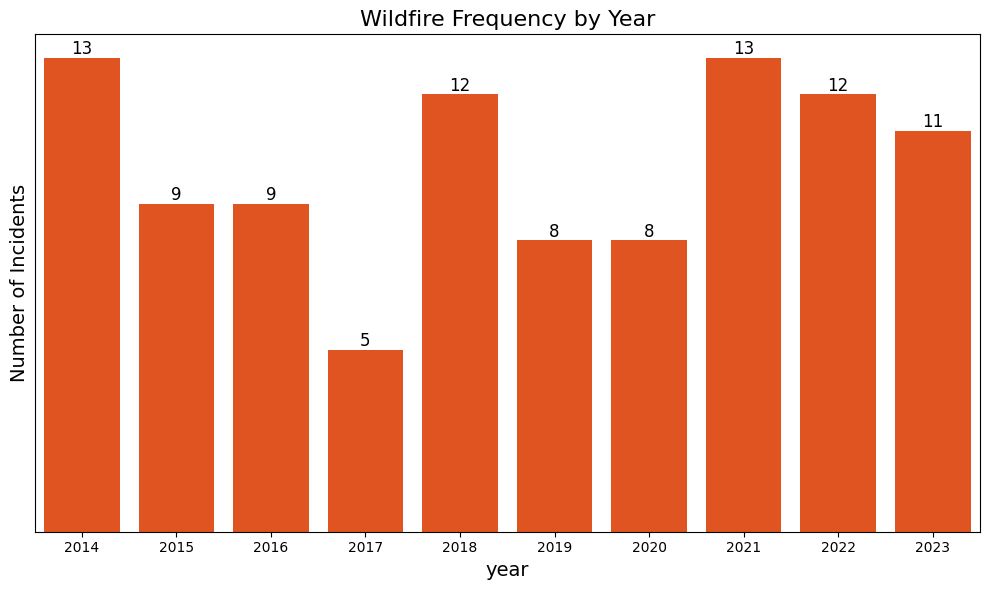

In [20]:
year_counts = California_Wildfire['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=year_counts.index, y=year_counts.values, color='#ff4500')
plt.title('Wildfire Frequency by Year', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.yticks([])
# Add data labels on top of each bar
for i, v in enumerate(year_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

## Q5.is there a corelation between the size of a wildfire and damage?

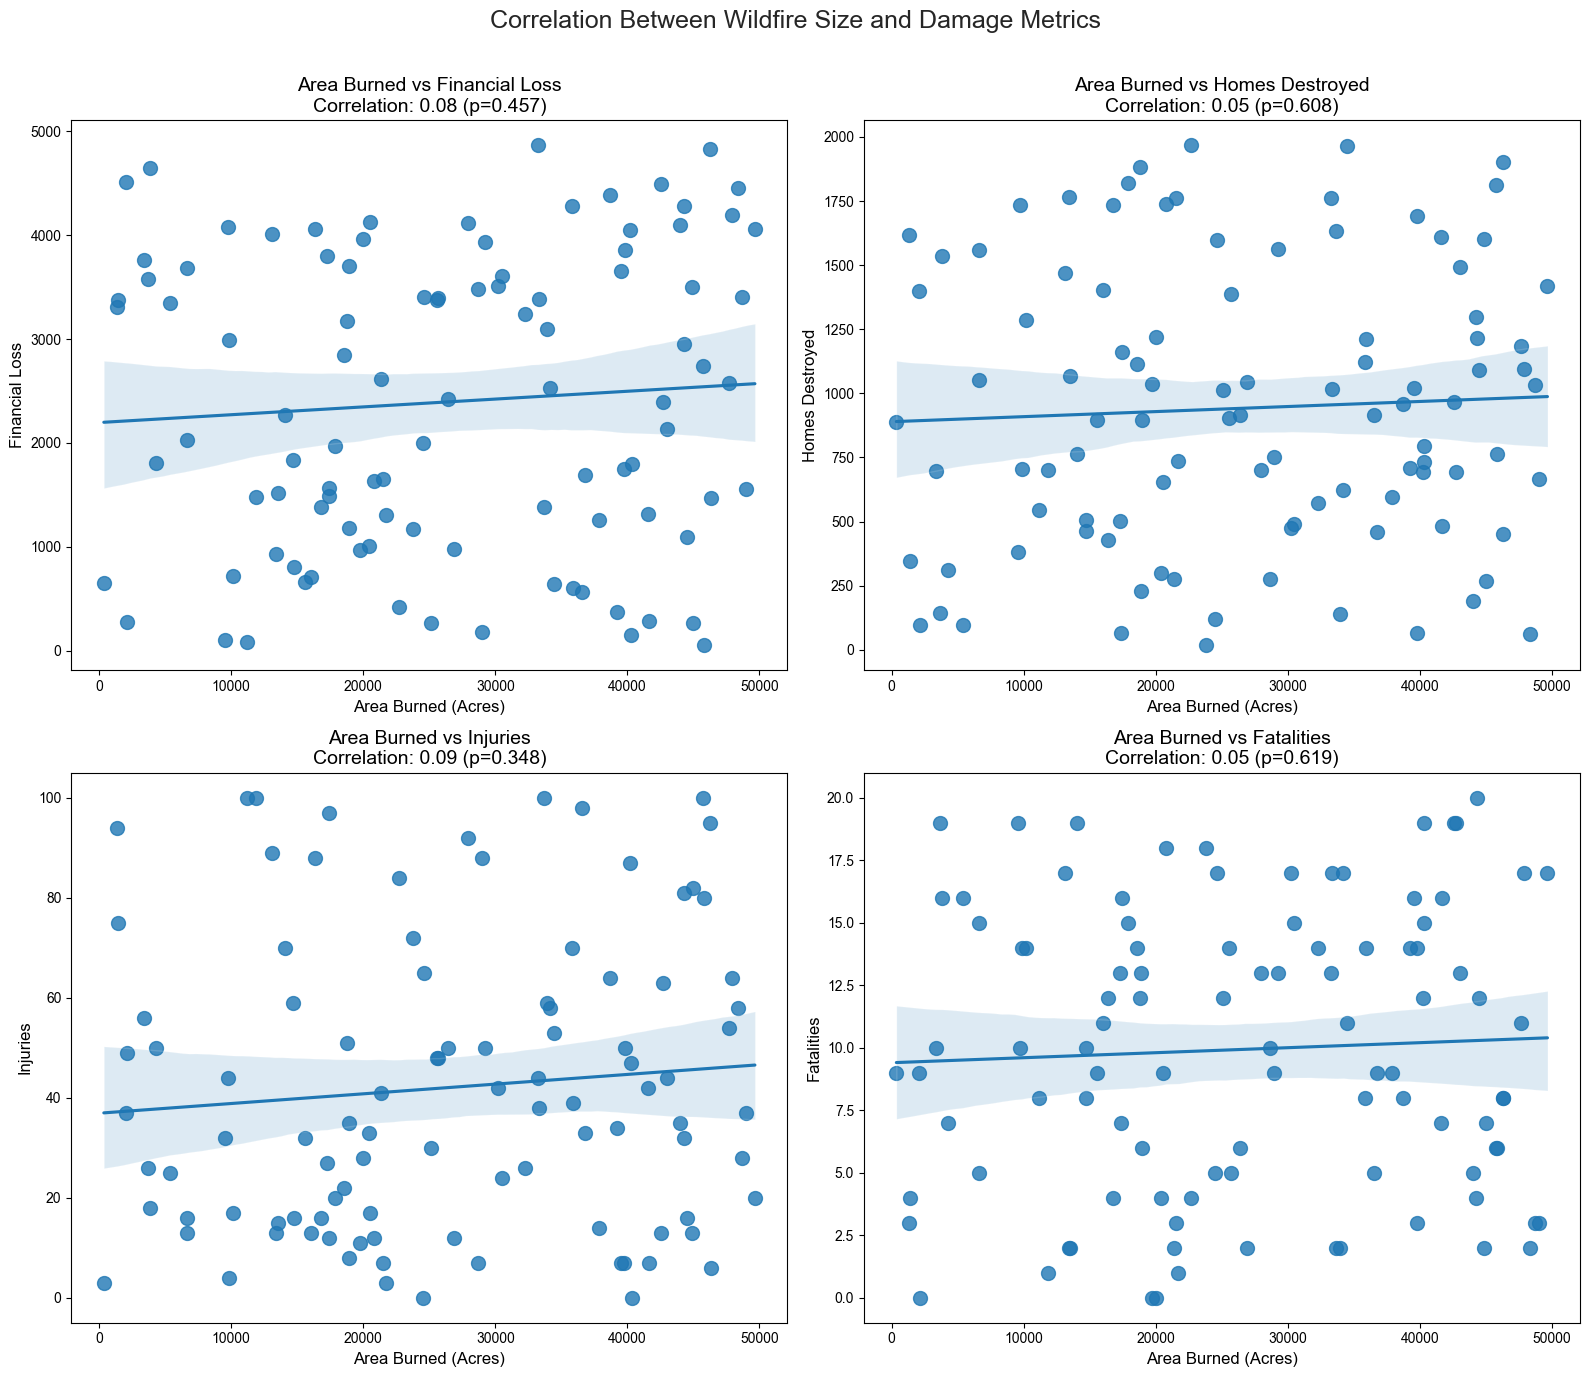

Correlation between Area Burned and damage metrics:
Financial Loss: 0.08 (p=0.457)
Homes Destroyed: 0.05 (p=0.608)
Injuries: 0.09 (p=0.348)


In [ ]:

# Set up the figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 14))
plt.subplots_adjust(hspace=0.3)

# Set seaborn style
sns.set_style('whitegrid')

# 1. Area Burned vs Financial Loss
ax1 = axs[0, 0]
sns.regplot(x='Area_Burned (Acres)', y='Financial_Loss', 
           data=California_Wildfire, ax=ax1, scatter_kws={'s': 100})

r1, p1 = stats.pearsonr(California_Wildfire['Area_Burned (Acres)'], California_Wildfire['Financial_Loss'])
ax1.set_title(f'Area Burned vs Financial Loss\nCorrelation: {r1:.2f} (p={p1:.3f})', fontsize=14)
ax1.set_xlabel('Area Burned (Acres)', fontsize=12)
ax1.set_ylabel('Financial Loss', fontsize=12)

# 2. Area Burned vs Homes Destroyed
ax2 = axs[0, 1]
sns.regplot(x='Area_Burned (Acres)', y='Homes_Destroyed', 
           data=California_Wildfire, ax=ax2, scatter_kws={'s': 100})

r2, p2 = stats.pearsonr(California_Wildfire['Area_Burned (Acres)'], California_Wildfire['Homes_Destroyed'])
ax2.set_title(f'Area Burned vs Homes Destroyed\nCorrelation: {r2:.2f} (p={p2:.3f})', fontsize=14)
ax2.set_xlabel('Area Burned (Acres)', fontsize=12)
ax2.set_ylabel('Homes Destroyed', fontsize=12)

# 3. Area Burned vs Injuries
ax3 = axs[1, 0]
sns.regplot(x='Area_Burned (Acres)', y='Injuries', 
           data=California_Wildfire, ax=ax3, scatter_kws={'s': 100})

r3, p3 = stats.pearsonr(California_Wildfire['Area_Burned (Acres)'], California_Wildfire['Injuries'])
ax3.set_title(f'Area Burned vs Injuries\nCorrelation: {r3:.2f} (p={p3:.3f})', fontsize=14)
ax3.set_xlabel('Area Burned (Acres)', fontsize=12)
ax3.set_ylabel('Injuries', fontsize=12)

# 4. Area Burned vs Fatalities
ax4 = axs[1, 1]
sns.regplot(x='Area_Burned (Acres)', y='Fatalities', 
           data=California_Wildfire, ax=ax4, scatter_kws={'s': 100})

r4, p4 = stats.pearsonr(California_Wildfire['Area_Burned (Acres)'], California_Wildfire['Fatalities'])
ax4.set_title(f'Area Burned vs Fatalities\nCorrelation: {r4:.2f} (p={p4:.3f})', fontsize=14)
ax4.set_xlabel('Area Burned (Acres)', fontsize=12)
ax4.set_ylabel('Fatalities', fontsize=12)

plt.suptitle('Correlation Between Wildfire Size and Damage Metrics', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('wildfire_correlation.png')
plt.show()

# Print correlation summary
print("Correlation between Area Burned and damage metrics:")
print(f"Financial Loss: {r1:.2f} (p={p1:.3f})")
print(f"Homes Destroyed: {r2:.2f} (p={p2:.3f})")
print(f"Injuries: {r3:.2f} (p={p3:.3f})")

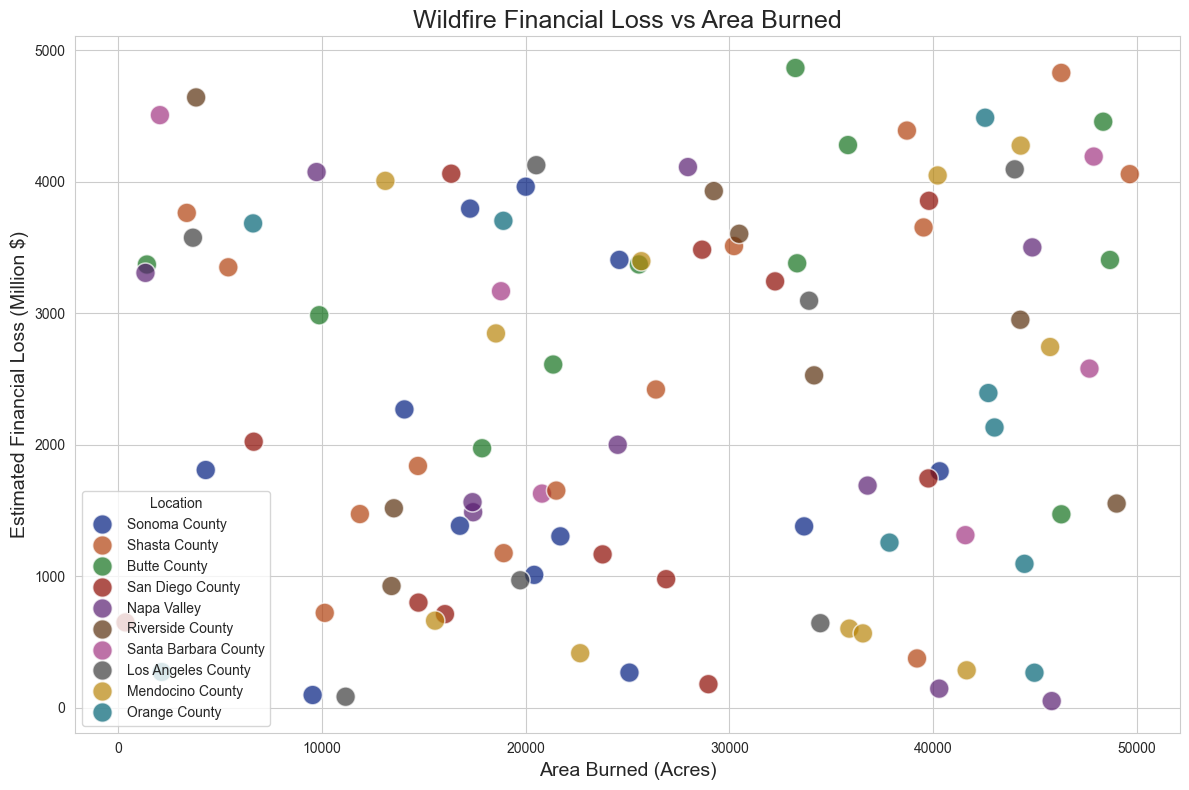

In [22]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='Area_Burned (Acres)', 
    y='Financial_Loss',
    data=California_Wildfire,
    s=200, 
    hue='Location', 
    palette='dark',
    alpha=0.7,  
    legend='auto'
)
plt.title('Wildfire Financial Loss vs Area Burned', fontsize=18)
plt.xlabel('Area Burned (Acres)', fontsize=14)
plt.ylabel('Estimated Financial Loss (Million $)', fontsize=14)
plt.tight_layout()
plt.show()


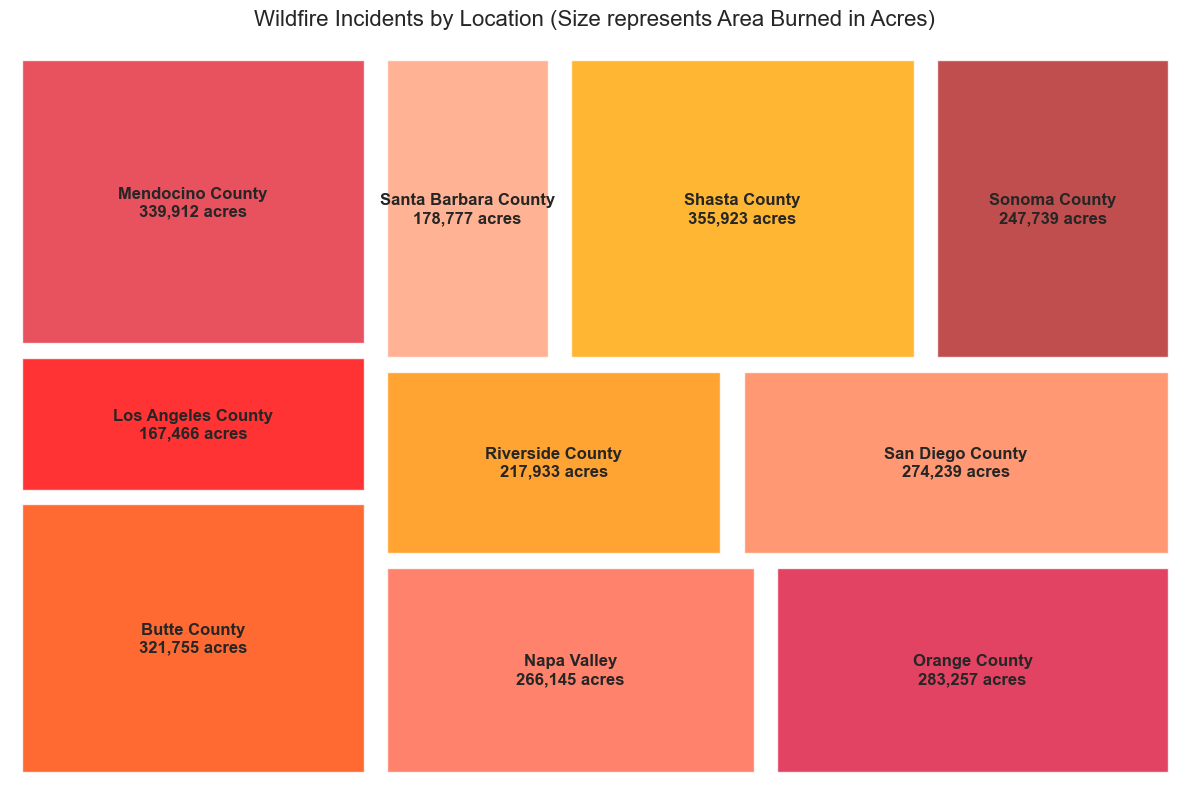

In [113]:
# Aggregate data by location (summing the area burned for each location)
location_data = California_Wildfire.groupby('Location')['Area_Burned (Acres)'].sum().reset_index()

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Define colors for each location - create a colormap
cmap = plt.cm.Reds
colors = cmap(np.linspace(0.4, 0.8, len(location_data)))

# Create labels that include location name and area burned
labels = [f"{loc}\n{area:,} acres" for loc, area in zip(location_data['Location'], location_data['Area_Burned (Acres)'])]

# Create the treemap
squarify.plot(
    sizes=location_data['Area_Burned (Acres)'],
    label=labels,
    alpha=0.8,
    color=['#ff4500','#ff0000','#E32636','#ff6347','#DC143c','#FF8c00','#FF7F50','#ffA07a','#FFa500','#B22222'],
    pad=True,
    text_kwargs={'fontsize':12, 'fontweight':'bold'}
)

# Remove axes
plt.axis('off')

# Add title
plt.title('Wildfire Incidents by Location (Size represents Area Burned in Acres)', fontsize=16, pad=20)

# Add a color bar to indicate the scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(min(location_data['Area_Burned (Acres)']), max(location_data['Area_Burned (Acres)'])))
sm.set_array([])
#cbar = plt.colorbar(sm)
#cbar.set_label('Area Burned (Acres)')

plt.tight_layout()
plt.show()